## SHTools Demo

This notbook is used to play around with a few things from the pyshtools library


In [60]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pyshtools
from pyshtools import spectralanalysis
from pyshtools import shio
from pyshtools import expand

from s2cnn import S2Convolution
from s2cnn import s2_fft
from s2cnn.utils.complex import as_complex

from training_set import TrainingSet

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Load input
First, load the current input feature set from the disk

In [131]:
restore = False
bandwidth = 100
train_set = TrainingSet(restore, bandwidth)
train_set.loadFeatures('/media/scratch/berlukas/exported_features')
print("total set size: ", len(train_set))

Loading 4000 features from: 
	 Anchor: /media/scratch/berlukas/exported_features/anchor/
	 Positive: /media/scratch/berlukas/exported_features/positive/
	 Negative: /media/scratch/berlukas/exported_features/negative/



total set size:  4000


## Perform a S2 transform of the features


In [162]:
loader = torch.utils.data.DataLoader(train_set, batch_size=1, shuffle=False, num_workers=1, pin_memory=True, drop_last=False)

coeff = None
for batch_idx, data in enumerate(loader):        
    #s2_fft.S2_fft_real.apply(data[0], 50)
    a = data[0].float()[0,1,:,:]
    p = data[1].float()[0,1,:,:]
    n = data[2].float()[0,1,:,:]
    print(a.shape)
    print(as_complex(a).shape)
    A = s2_fft.s2_fft(as_complex(a))
    print(A.shape)
    print(A[0,:])
    if batch_idx == 15:
        break


torch.Size([200, 200])
torch.Size([200, 200, 2])
torch.Size([10000, 2])
tensor([101.4672,   0.0000])
torch.Size([200, 200])
torch.Size([200, 200, 2])
torch.Size([10000, 2])
tensor([101.4672,   0.0000])
torch.Size([200, 200])
torch.Size([200, 200, 2])
torch.Size([10000, 2])
tensor([101.4672,   0.0000])
torch.Size([200, 200])
torch.Size([200, 200, 2])
torch.Size([10000, 2])
tensor([101.4672,   0.0000])
torch.Size([200, 200])
torch.Size([200, 200, 2])
torch.Size([10000, 2])
tensor([101.4672,   0.0000])
torch.Size([200, 200])
torch.Size([200, 200, 2])
torch.Size([10000, 2])
tensor([101.4672,   0.0000])
torch.Size([200, 200])
torch.Size([200, 200, 2])
torch.Size([10000, 2])
tensor([101.4672,   0.0000])
torch.Size([200, 200])
torch.Size([200, 200, 2])
torch.Size([10000, 2])
tensor([101.4672,   0.0000])
torch.Size([200, 200])
torch.Size([200, 200, 2])
torch.Size([10000, 2])
tensor([101.4672,   0.0000])
torch.Size([200, 200])
torch.Size([200, 200, 2])
torch.Size([10000, 2])
tensor([101.4672,  

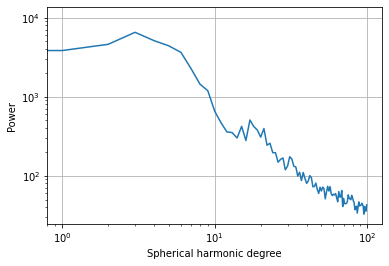

In [170]:
a_t = torch.transpose(a, 0,1)
#grid = as_complex(torch.transpose(a, 0,1))
#grid = torch.reshape(grid, (grid.size(2), grid.size(0), grid.size(1)))
#a_grid = pyshtools.expand.MakeGridDH(grid, sampling=1)
a_coeffs = pyshtools.expand.SHExpandDH(a, sampling=1)
power_per_l = pyshtools.spectralanalysis.spectrum(a_coeffs)
degrees = np.arange(a_coeffs.shape[1])

fig, ax = plt.subplots(1, 1)
ax.plot(degrees, power_per_l)
ax.set(yscale='log', xscale='log', xlabel='Spherical harmonic degree', ylabel='Power')
ax.grid()

Probability of being correlated at 1 is 0.9208631767312014
Probability of being correlated at 2 is 0.994828039051865
Probability of being correlated at 3 is 0.9993786946071705
Probability of being correlated at 4 is 0.9999357643685939
Probability of being correlated at 5 is 0.9998278487653118
Probability of being correlated at 6 is 0.9999325166071056
Probability of being correlated at 7 is 0.999751929540683
Probability of being correlated at 8 is 0.9996985251945659
Probability of being correlated at 9 is 0.9954535968556658
Probability of being correlated at 10 is 0.9992955215841378
Probability of being correlated at 11 is 0.9659449820369462
Probability of being correlated at 12 is 0.9192705062044991
Probability of being correlated at 13 is 0.9796034537027054
Probability of being correlated at 14 is 0.6201637878259286
Probability of being correlated at 15 is 0.8081261237405976
Probability of being correlated at 16 is 0.9362324683439375
Probability of being correlated at 17 is 0.98776865

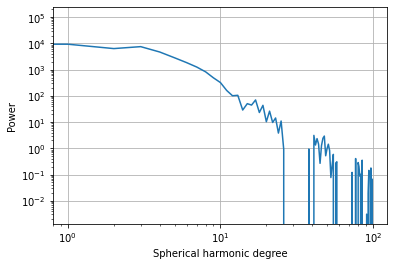

In [171]:
p_t = torch.transpose(p, 0,1)
#grid = as_complex(torch.transpose(p, 0,1))
#grid = torch.reshape(grid, (grid.size(2), grid.size(0), grid.size(1)))
#p_grid = pyshtools.expand.MakeGridDH(grid, sampling=1)
p_coeffs = pyshtools.expand.SHExpandDH(p, sampling=1)
power_per_l = spectralanalysis.cross_spectrum(a_coeffs, p_coeffs, normalization='schmidt', convention='energy')
degrees = np.arange(a_coeffs.shape[1])

fig, ax = plt.subplots(1, 1)
ax.plot(degrees, power_per_l)
ax.set(yscale='log', xscale='log', xlabel='Spherical harmonic degree', ylabel='Power')
ax.grid()

admit, error, corr = spectralanalysis.SHAdmitCorr(a_coeffs, p_coeffs)
for i in range(0, 100):
    prob = spectralanalysis.SHConfidence(i, corr[i])
    if (prob < 1.0):
        print(f'Probability of being correlated at {i} is {prob}')

Probability of being correlated at 1 is 0.2531631323573318
Probability of being correlated at 2 is 0.50906865929204
Probability of being correlated at 3 is 0.26853048016664405
Probability of being correlated at 4 is 0.03440372851365661
Probability of being correlated at 5 is 0.7531996583173026
Probability of being correlated at 6 is 0.5038592943738656
Probability of being correlated at 7 is 0.46258544869206225
Probability of being correlated at 8 is 0.6494038092630534
Probability of being correlated at 9 is 0.7791951177011801
Probability of being correlated at 10 is 0.8022510218039793
Probability of being correlated at 11 is 0.1322647525130245
Probability of being correlated at 12 is 0.5673545692768612
Probability of being correlated at 13 is 0.8595268424480458
Probability of being correlated at 14 is 0.2858215836922526
Probability of being correlated at 15 is 0.5791100610814872
Probability of being correlated at 16 is 0.14459269637492467
Probability of being correlated at 17 is 0.7994

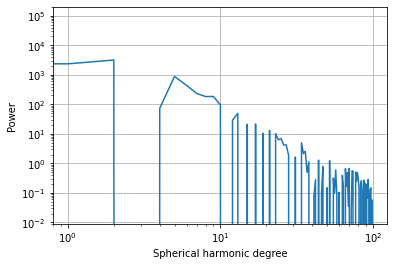

In [172]:
n_t = torch.transpose(n, 0,1)
#grid = as_complex(torch.transpose(n, 0,1))
#grid = torch.reshape(grid, (grid.size(2), grid.size(0), grid.size(1)))
#n_grid = pyshtools.expand.MakeGridDH(grid, sampling=1)
n_coeffs = pyshtools.expand.SHExpandDH(n, sampling=1)
power_per_l = spectralanalysis.cross_spectrum(a_coeffs, n_coeffs, normalization='schmidt', convention='energy')
degrees = np.arange(a_coeffs.shape[1])

fig, ax = plt.subplots(1, 1)
ax.plot(degrees, power_per_l)
ax.set(yscale='log', xscale='log', xlabel='Spherical harmonic degree', ylabel='Power')
ax.grid()


admit, error, corr = spectralanalysis.SHAdmitCorr(a_coeffs, n_coeffs)
for i in range(0, 100):
    prob = spectralanalysis.SHConfidence(i, corr[i])
    if (prob < 1.0):
        print(f'Probability of being correlated at {i} is {prob}')